<a href="https://colab.research.google.com/github/imhrishita/ML/blob/main/Keras-STP-BOD-Prediction4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
from google.colab import files
uploaded = files.upload()

Saving STP.csv to STP.csv


In [5]:
stp=pd.read_csv("STP.csv")
stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  136 non-null    object 
 1   Influent BOD5         136 non-null    int64  
 2   Influent TSS          136 non-null    int64  
 3   Influent NH3          136 non-null    float64
 4   temperature           136 non-null    float64
 5   Influent pH           136 non-null    float64
 6   Influent Alkalinity   136 non-null    int64  
 7   Effluent BOD5         136 non-null    float64
 8   Effluent TSS          136 non-null    float64
 9   Effluent NH3          136 non-null    float64
 10  Aerobic NOx           136 non-null    float64
 11  Effluent pH           136 non-null    float64
 12  Field MLSS            136 non-null    float64
 13  Anoxic tank DO        136 non-null    float64
 14  Aerobic NH3           136 non-null    float64
 15  Aerobic DO            1

In [6]:
stp.pop('Influent TSS')
stp.pop('Effluent TSS')
stp.pop('Unnamed: 16')
stp.pop('Date')
stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Influent BOD5         136 non-null    int64  
 1   Influent NH3          136 non-null    float64
 2   temperature           136 non-null    float64
 3   Influent pH           136 non-null    float64
 4   Influent Alkalinity   136 non-null    int64  
 5   Effluent BOD5         136 non-null    float64
 6   Effluent NH3          136 non-null    float64
 7   Aerobic NOx           136 non-null    float64
 8   Effluent pH           136 non-null    float64
 9   Field MLSS            136 non-null    float64
 10  Anoxic tank DO        136 non-null    float64
 11  Aerobic NH3           136 non-null    float64
 12  Aerobic DO            136 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 13.9 KB


In [7]:
X=stp.drop(['Effluent BOD5'],axis=1).values
y=stp['Effluent BOD5'].values

In [113]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=23)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full, random_state=23)

In [114]:
X_train.shape, y_train.shape

((76, 12), (76,))

In [115]:
X_valid.shape, y_valid.shape

((26, 12), (26,))

In [116]:
X_test.shape, y_test.shape

((34, 12), (34,))

In [117]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [118]:
np.random.seed(23)
tf.random.set_seed(23)

In [167]:
inputs = keras.Input(shape=(12,))
x = keras.layers.Dense(100, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(30, activation="relu", name="dense_2")(x)
x = keras.layers.Dense(30, activation="sigmoid", name="dense_3")(x)
outputs = keras.layers.Dense(1, name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [168]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-2),
              metrics=['mae'])

In [169]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("OptimumTrainedModel.h5",save_best_only=True)

In [170]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [171]:
model_history=model.fit(X_train,y_train, epochs=500, validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/500
3/3 [==============================] - 0s 74ms/step - loss: 13.6550 - mae: 2.6868 - val_loss: 4.5746 - val_mae: 1.5364
Epoch 2/500
3/3 [==============================] - 0s 12ms/step - loss: 8.6027 - mae: 1.8912 - val_loss: 3.1976 - val_mae: 1.2300
Epoch 3/500
3/3 [==============================] - 0s 10ms/step - loss: 7.3334 - mae: 1.7086 - val_loss: 2.6951 - val_mae: 1.1550
Epoch 4/500
3/3 [==============================] - 0s 10ms/step - loss: 6.7926 - mae: 1.6700 - val_loss: 2.6094 - val_mae: 1.1485
Epoch 5/500
3/3 [==============================] - 0s 10ms/step - loss: 6.6169 - mae: 1.6612 - val_loss: 2.5702 - val_mae: 1.1774
Epoch 6/500
3/3 [==============================] - 0s 13ms/step - loss: 6.4347 - mae: 1.6824 - val_loss: 2.5546 - val_mae: 1.1843
Epoch 7/500
3/3 [==============================] - 0s 13ms/step - loss: 6.3179 - mae: 1.6897 - val_loss: 2.5003 - val_mae: 1.1489
Epoch 8/500
3/3 [==============================] - 0s 10ms/step - loss: 6.2493 - mae: 1.6

In [172]:
mae_test=model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 2.1278 - mae: 1.1175


In [173]:
model_history.history

{'loss': [13.654974937438965,
  8.602673530578613,
  7.33335542678833,
  6.792591094970703,
  6.6169352531433105,
  6.4346537590026855,
  6.317862033843994,
  6.249255657196045,
  6.1191086769104,
  5.931559085845947,
  5.774347305297852,
  5.666602611541748,
  5.5400567054748535,
  5.393511772155762,
  5.264315605163574,
  5.125064849853516,
  5.131494045257568,
  4.926578998565674,
  4.798322677612305,
  4.722713947296143,
  4.722301959991455,
  4.617068290710449,
  4.522388458251953,
  4.382253170013428,
  4.297266483306885,
  4.229438304901123,
  4.13652229309082,
  4.086986541748047,
  3.973844528198242,
  3.8971855640411377,
  3.82476806640625,
  3.7475602626800537],
 'mae': [2.6867547035217285,
  1.891217827796936,
  1.7086089849472046,
  1.669965386390686,
  1.6611567735671997,
  1.6824026107788086,
  1.6897350549697876,
  1.6441951990127563,
  1.6624116897583008,
  1.6684101819992065,
  1.6474064588546753,
  1.595705270767212,
  1.5624003410339355,
  1.574824333190918,
  1.506

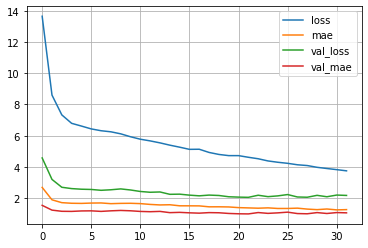

In [174]:
pd.DataFrame(model_history.history).plot(kind='line')
plt.grid(True)
plt.show()

In [175]:
y_predict=model.predict(X_test)
y_predict,y_test.round(4)

(array([[3.6475523],
        [5.967339 ],
        [4.390223 ],
        [4.20169  ],
        [3.8009815],
        [4.675528 ],
        [4.952248 ],
        [3.678894 ],
        [4.0886006],
        [3.7314134],
        [5.675215 ],
        [4.6093187],
        [3.6739132],
        [3.9494126],
        [4.904287 ],
        [3.885473 ],
        [4.1584606],
        [4.2546787],
        [3.965943 ],
        [3.7578268],
        [4.8685894],
        [5.4379387],
        [5.7523565],
        [3.9544055],
        [4.221482 ],
        [4.2348003],
        [4.684033 ],
        [3.932921 ],
        [4.1384597],
        [4.887719 ],
        [4.819428 ],
        [3.3662462],
        [3.2906103],
        [4.003879 ]], dtype=float32),
 array([2.95, 4.  , 2.  , 3.84, 2.  , 3.  , 1.  , 2.33, 5.  , 3.57, 2.  ,
        6.  , 4.  , 4.6 , 5.5 , 2.46, 3.  , 5.  , 4.  , 3.73, 4.  , 4.  ,
        4.5 , 3.87, 4.  , 5.  , 5.78, 3.5 , 4.  , 4.  , 4.2 , 1.26, 1.  ,
        4.5 ]))